In [1]:
#Loading Packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline, Pipeline



In [2]:
df = pd.read_csv('/Users/rahmaabdullahi/Documents/Streamlit/streamlit_env/MLproj/listingsbefore.csv')
df

,host_id,host_since,host_location,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month,neighbourhood_groups
0,2613,8/29/08,"Chicago, IL",1.00,0.97,1,1,t,t,Hyde Park,...,320,207,4.99,4.99,4.99,4.99,4.96,t,2.21,South Side
1,17928,5/19/09,"Chicago, IL",1.00,0.96,2,2,t,t,West Town,...,320,459,4.68,4.56,4.90,4.87,4.88,f,2.86,West Side
2,33004,8/21/09,"Chicago, IL",1.00,0.99,9,82,t,t,Lincoln Park,...,137,56,4.63,4.80,4.79,4.77,4.98,t,0.55,North Side
3,46734,10/18/09,"Chicago, IL",1.00,0.89,1,1,t,t,Lincoln Park,...,165,13,5.00,5.00,5.00,5.00,5.00,f,0.15,North Side
4,101521,3/31/10,"Chicago, IL",0.90,0.77,8,12,t,t,Lincoln Park,...,306,40,4.28,3.93,4.14,3.96,4.89,f,0.27,North Side
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,22094147,10/3/14,"Oak Park, IL",0.99,0.98,169,183,t,t,Austin,...,0,6,3.67,3.50,4.00,4.33,4.67,f,0.38,West Side
7410,30147879,3/28/15,"River Forest, IL",NaN,1.00,1,1,t,t,Austin,...,0,4,5.00,5.00,5.00,5.00,4.75,f,0.12,West Side
7411,447662042,3/3/22,NaN,1.00,1.00,7,7,t,t,Austin,...,0,4,5.00,4.75,5.00,5.00,5.00,f,2.50,West Side
7412,124980082,4/9/17,"Pennsylvania, United States",NaN,0.67,1,1,t,t,Ohare,...,0,5,4.80,4.80,5.00,5.00,5.00,f,0.46,Far North Side


In [23]:
df.dtypes

host_id                          int64
host_since                      object
host_location                   object
host_response_rate             float64
host_acceptance_rate           float64
host_listings_count              int64
host_total_listings_count        int64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood_cleansed          object
room_type                       object
accommodates                     int64
bathrooms_text                  object
bedrooms                       float64
price                            int64
minimum_nights                   int64
maximum_nights                   int64
has_availability                object
availability_30                  int64
availability_365                 int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location   

In [3]:
#Changing column to date 
df["host_since"] = pd.to_datetime(df["host_since"])

/var/folders/6t/p7h34yrx2zg7pn9kpp0bdfp40000gn/T/ipykernel_24599/1011848798.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.var())


host_id                        2.021127e+16
host_response_rate             1.110215e-02
host_acceptance_rate           3.611410e-02
host_listings_count            1.077629e+06
host_total_listings_count      1.295921e+06
accommodates                   8.518222e+00
bedrooms                       1.244955e+00
price                          8.324638e+04
minimum_nights                 1.706119e+03
maximum_nights                 2.288572e+05
availability_30                9.278081e+01
availability_365               1.748225e+04
number_of_reviews              6.807387e+03
review_scores_rating           2.195545e-01
review_scores_cleanliness      1.712250e-01
review_scores_checkin          1.213552e-01
review_scores_communication    1.368393e-01
review_scores_location         1.472686e-01
reviews_per_month              3.750798e+00
dtype: float64


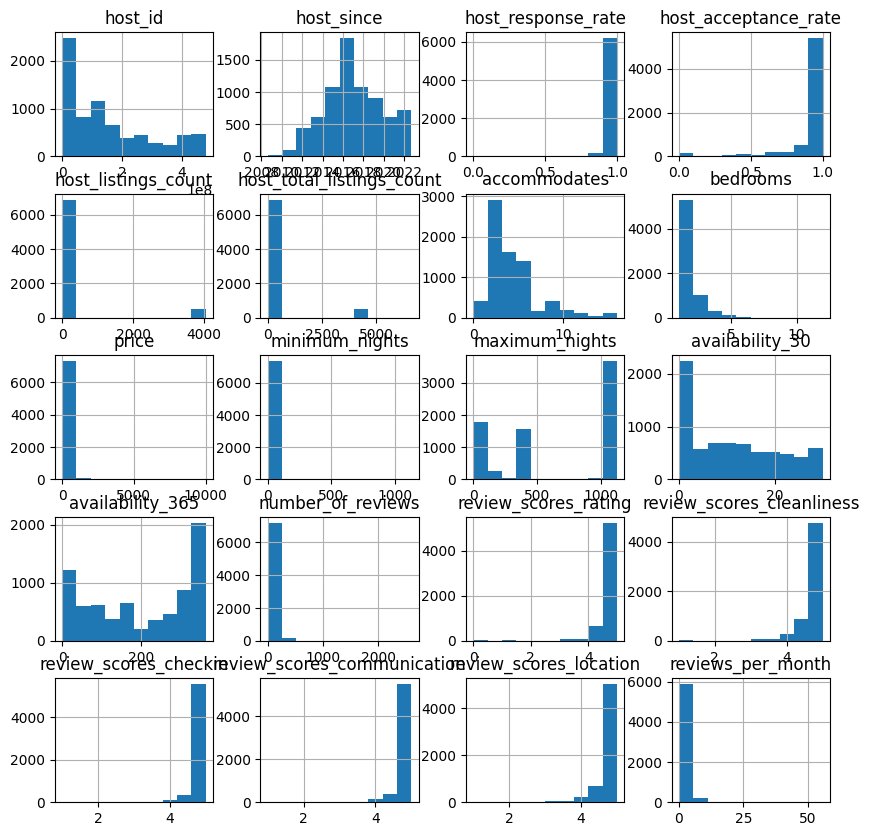

In [25]:
df.hist(figsize=(10,10),bins=10)
print(df.var())

In [4]:
#Dummy Variables 
le = LabelEncoder()
df['instant_bookable']= le.fit_transform(df['instant_bookable'])
df['host_has_profile_pic']= le.fit_transform(df['host_has_profile_pic'])
df['host_identity_verified']= le.fit_transform(df['host_identity_verified'])
df['has_availability']= le.fit_transform(df['has_availability'])
df['room_type']= le.fit_transform(df['room_type'])
df['neighbourhood_groups1']= le.fit_transform(df['neighbourhood_groups'])


df.head()

,host_id,host_since,host_location,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month,neighbourhood_groups,neighbourhood_groups1
0,2613,2008-08-29,"Chicago, IL",1.0,0.97,1,1,1,1,Hyde Park,...,207,4.99,4.99,4.99,4.99,4.96,1,2.21,South Side,6
1,17928,2009-05-19,"Chicago, IL",1.0,0.96,2,2,1,1,West Town,...,459,4.68,4.56,4.90,4.87,4.88,0,2.86,West Side,8
2,33004,2009-08-21,"Chicago, IL",1.0,0.99,9,82,1,1,Lincoln Park,...,56,4.63,4.80,4.79,4.77,4.98,1,0.55,North Side,4
3,46734,2009-10-18,"Chicago, IL",1.0,0.89,1,1,1,1,Lincoln Park,...,13,5.00,5.00,5.00,5.00,5.00,0,0.15,North Side,4
4,101521,2010-03-31,"Chicago, IL",0.9,0.77,8,12,1,1,Lincoln Park,...,40,4.28,3.93,4.14,3.96,4.89,0,0.27,North Side,4


In [5]:
#Checking NUlls
df.isnull().sum(axis = 0)

host_id                           0
host_since                        0
host_location                  1107
host_response_rate              885
host_acceptance_rate            667
host_listings_count               0
host_total_listings_count         0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
room_type                         0
accommodates                      0
bathrooms_text                   14
bedrooms                        596
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating           1312
review_scores_cleanliness      1327
review_scores_checkin          1327
review_scores_communication    1328
review_scores_location         1327
instant_bookable                  0
reviews_per_month           

In [5]:
#Dropping columns with many nulls
df1= df.drop(["host_location", "review_scores_rating","review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "reviews_per_month", "host_since", "neighbourhood_groups",'neighbourhood_cleansed', 'bathrooms_text'], axis=1 )

#Checking Nulls Again
df1.isnull().sum(axis = 0)

host_id                        0
host_response_rate           885
host_acceptance_rate         667
host_listings_count            0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
room_type                      0
accommodates                   0
bedrooms                     596
price                          0
minimum_nights                 0
maximum_nights                 0
has_availability               0
availability_30                0
availability_365               0
number_of_reviews              0
instant_bookable               0
neighbourhood_groups1          0
dtype: int64

In [29]:
df1.head()

,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,room_type,accommodates,bedrooms,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,instant_bookable,neighbourhood_groups1
0,2613,1.0,0.97,1,1,1,1,2,1,1.0,110,3,89,1,13,320,207,1,6
1,17928,1.0,0.96,2,2,1,1,0,2,1.0,91,2,60,1,11,320,459,0,8
2,33004,1.0,0.99,9,82,1,1,0,4,2.0,157,4,180,1,4,137,56,1,4
3,46734,1.0,0.89,1,1,1,1,2,3,1.0,329,2,7,1,21,165,13,0,4
4,101521,0.9,0.77,8,12,1,1,0,3,1.0,86,32,395,1,0,306,40,0,4


In [6]:
#Null Imputations
df1['bedrooms']=df1['bedrooms'].fillna(df1['bedrooms'].mean())
df1['price']=df1['price'].fillna(df1['price'].mean())

df1['host_response_rate']=df1['host_response_rate'].fillna(df1['host_response_rate'].mean())
df1['host_acceptance_rate']=df1['host_acceptance_rate'].fillna(df1['host_acceptance_rate'].mean())

df1['host_listings_count']=df1['host_listings_count'].fillna(df1['host_listings_count'].mean())
df1['host_total_listings_count']=df1['host_total_listings_count'].fillna(df1['host_total_listings_count'].mean())



df1.isnull().sum(axis = 0)



host_id                      0
host_response_rate           0
host_acceptance_rate         0
host_listings_count          0
host_total_listings_count    0
host_has_profile_pic         0
host_identity_verified       0
room_type                    0
accommodates                 0
bedrooms                     0
price                        0
minimum_nights               0
maximum_nights               0
has_availability             0
availability_30              0
availability_365             0
number_of_reviews            0
instant_bookable             0
neighbourhood_groups1        0
dtype: int64

In [55]:
df1.corr().style.background_gradient(cmap='flare').set_precision(2)


/var/folders/6t/p7h34yrx2zg7pn9kpp0bdfp40000gn/T/ipykernel_3384/1631312422.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df1.corr().style.background_gradient(cmap='flare').set_precision(2)


,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,room_type,accommodates,bedrooms,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,instant_bookable,neighbourhood_groups1
host_id,1.00,-0.03,0.05,-0.08,-0.08,-0.15,-0.08,-0.03,0.01,0.02,0.03,-0.02,-0.13,-0.01,0.20,0.04,-0.22,0.13,-0.04
host_response_rate,-0.03,1.00,0.17,0.07,0.07,0.04,0.08,-0.01,0.04,0.01,-0.10,-0.02,0.06,0.00,-0.09,-0.01,0.04,-0.02,0.01
host_acceptance_rate,0.05,0.17,1.00,0.09,0.09,0.00,0.03,0.03,0.00,-0.00,-0.02,-0.20,-0.04,0.17,-0.04,0.05,0.12,0.29,0.09
host_listings_count,-0.08,0.07,0.09,1.00,0.99,0.03,0.11,-0.15,-0.16,-0.10,-0.02,0.12,0.27,0.05,-0.21,0.16,-0.16,0.33,-0.16
host_total_listings_count,-0.08,0.07,0.09,0.99,1.00,0.03,0.09,-0.14,-0.16,-0.10,-0.01,0.11,0.26,0.05,-0.20,0.16,-0.16,0.33,-0.17
host_has_profile_pic,-0.15,0.04,0.00,0.03,0.03,1.00,0.01,-0.00,-0.01,-0.00,-0.02,0.01,0.04,-0.01,-0.09,-0.06,0.04,-0.03,0.00
host_identity_verified,-0.08,0.08,0.03,0.11,0.09,0.01,1.00,0.03,0.01,0.00,-0.01,-0.00,0.03,0.07,0.01,0.02,0.01,0.00,0.02
room_type,-0.03,-0.01,0.03,-0.15,-0.14,-0.00,0.03,1.00,-0.39,-0.39,-0.22,0.02,-0.07,-0.05,0.01,-0.08,0.02,0.03,0.11
accommodates,0.01,0.04,0.00,-0.16,-0.16,-0.01,0.01,-0.39,1.00,0.80,0.44,-0.10,-0.02,0.05,0.15,0.07,0.02,-0.09,0.07
bedrooms,0.02,0.01,-0.00,-0.10,-0.10,-0.00,0.00,-0.39,0.80,1.00,0.46,-0.07,0.00,0.04,0.12,0.05,-0.04,-0.08,0.06


In [7]:
#Creating feature & target arrays 
X = df1.drop("price", axis = 1).values
y = df1["price"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [8]:
# Making Predictions from a single feature; predict price from bedrooms
X_rooms = X[:,9]
print(y.shape, X_rooms.shape)

X_rooms = X_rooms.reshape(-1,1)
print(X_rooms.shape)

(7414,) (7414,)
(7414, 1)


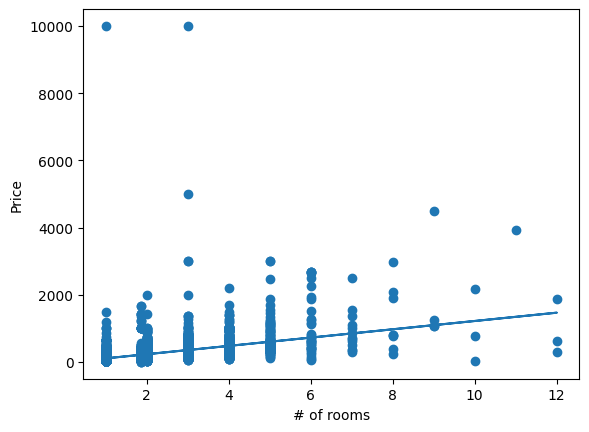

In [9]:
reg = LinearRegression()
reg.fit(X_rooms, y)
predictions = reg.predict(X_rooms)
plt.scatter(X_rooms, y)
plt.plot(X_rooms, predictions)
plt.ylabel("Price")
plt.xlabel("# of rooms")
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,
                                                    random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [11]:
reg_all.score(X_test, y_test)

0.4198320543638977

In [12]:
mean_squared_error(y_test, y_pred, squared=False)

171.4640116253661

In [13]:
category_check = X.dtypes == object
category_check

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [14]:
#ridge regression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, LogisticRegression, LinearRegression, Lasso, ElasticNet
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model_ridge = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Ridge())
model_ridge.fit(X_train, y_train)
scores = cross_val_score(model_ridge, X_train, y_train, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

NameError: name 'category_check' is not defined

In [14]:
# XGBoosting (Using non - significant variables as well)

from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')
 
#Printing all the parameters of XGBoost
print(RegModel)
 
#Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)
 
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))
 

XGBRegressor(n_estimators=500)
[16:50:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9057203673106887


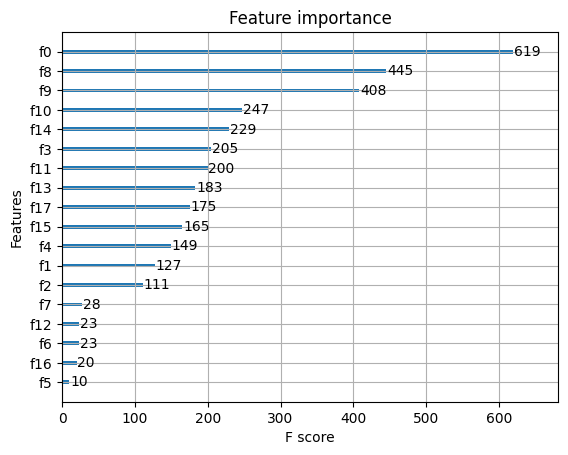

In [15]:
# plot feature importance (Using non - significant variables as well)
from matplotlib import pyplot
from xgboost import plot_importance

plot_importance(XGB)
pyplot.show()

In [17]:
import statsmodels.api as sm
from IPython.display import HTML, display


# adding the constant term
x = sm.add_constant(X)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, X).fit()

# summarize our model
results_summary = result.summary()
 
# printing the summary table
#print(result.summary())


# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(results_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

Alot of non - significant variablea are present, so we will need to drop them by using a backwards elimimation method, and rerun the XGB model to observe any differences.

In [18]:
list(df1.columns)


['host_id',
 'host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'room_type',
 'accommodates',
 'bedrooms',
 'price',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_365',
 'number_of_reviews',
 'instant_bookable',
 'neighbourhood_groups1']

In [31]:
## getting column names
x_columns = ['host_id',
 'host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'room_type',
 'accommodates',
 'bedrooms',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_365',
 'number_of_reviews',
 'instant_bookable',
 'neighbourhood_groups1']
y = df1["price"]

In [73]:
## creating function to get model statistics
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = df1[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.520
Model:                            OLS   Adj. R-squared (uncentered):              0.520
Method:                 Least Squares   F-statistic:                              803.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                        0.00
Time:                        17:40:52   Log-Likelihood:                         -51391.
No. Observations:                7414   AIC:                                  1.028e+05
Df Residuals:                    7404   BIC:                                  1.029e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [33]:
zz#Removing non significant variables
x_columns.remove("host_id")
x_columns.remove("host_acceptance_rate")
x_columns.remove("host_identity_verified")
x_columns.remove("room_type")
x_columns.remove("maximum_nights")
x_columns.remove("minimum_nights")
x_columns.remove("has_availability")
x_columns.remove("availability_365")

get_stats()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.520
Model:                            OLS   Adj. R-squared (uncentered):              0.520
Method:                 Least Squares   F-statistic:                              803.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                        0.00
Time:                        16:53:33   Log-Likelihood:                         -51391.
No. Observations:                7414   AIC:                                  1.028e+05
Df Residuals:                    7404   BIC:                                  1.029e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [81]:
x = df1[x_columns]
list(x)

['host_response_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'accommodates',
 'bedrooms',
 'availability_30',
 'number_of_reviews',
 'instant_bookable',
 'neighbourhood_groups1']

In [103]:
Xdf = df1.filter(['host_response_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'accommodates',
 'bedrooms',
 'availability_30',
 'number_of_reviews',
 'instant_bookable',
 'neighbourhood_groups1'], axis=1)

X = Xdf.values

y = df1["price"].values
print(type(X), type(y))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [77]:
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,
                                                    random_state=42)

In [105]:

RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')
 
#Printing all the parameters of XGBoost
print(RegModel)
 
#Creating the model on Training Data
xgb=RegModel.fit(X_train,y_train)
prediction=xgb.predict(X_test)
 
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

XGBRegressor(n_estimators=500)
[17:52:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.5753670784629645


Text(0.5, 0, 'Xgboost Feature Importance')

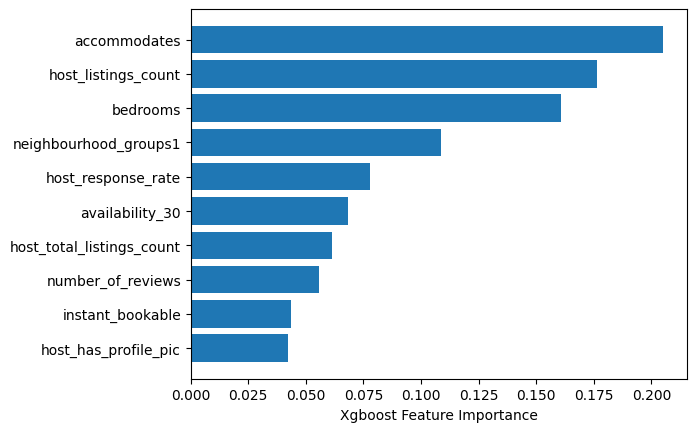

In [106]:
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")